## Import Library

In [1]:
import pandas as pd
import h5py
import numpy as np
import math
from scipy.stats import entropy
import time

## Load Loyalty User to Find the Niche Artist

In [2]:
df=pd.read_hdf('loyalty_user.h5','a')
df

,msno,artist_id,number,artist_total_number,number_rate,max_rate,each_artist_entrop
10465,12923,5407.0,1.0,1.0,1.000000,1.000000,0.00
21804,29882,437.0,25.0,25.0,1.000000,1.000000,0.00
28195,39063,17978.0,15.0,15.0,1.000000,1.000000,0.00
28996,39647,1034298.0,69.0,69.0,1.000000,1.000000,0.00
36093,49370,6651.0,14.0,14.0,1.000000,1.000000,0.00
48749,64711,2776222.0,1.0,1.0,1.000000,1.000000,0.00
53606,70082,5773956.0,99.0,99.0,1.000000,1.000000,0.00
67113,87525,29663.0,5.0,5.0,1.000000,1.000000,0.00
68691,90649,316.0,7.0,7.0,1.000000,1.000000,0.00
70640,94001,74.0,1.0,1.0,1.000000,1.000000,0.00


## Method one

In [3]:
df2=df.groupby(['artist_id','msno'])['number'].sum().reset_index()
df2

,artist_id,msno,number
0,1.0,1082860,3.0
1,1.0,1281142,1.0
2,1.0,2877851,5.0
3,1.0,3494818,2.0
4,1.0,3616279,1.0
5,1.0,4781044,1.0
6,1.0,5393255,4.0
7,1.0,6078703,13.0
8,1.0,6459252,1.0
9,1.0,7607046,10.0


In [4]:
df2['msno_total_number']=df2.groupby("msno")["number"].transform("sum")
df2

,artist_id,msno,number,msno_total_number
0,1.0,1082860,3.0,3619.0
1,1.0,1281142,1.0,1893.0
2,1.0,2877851,5.0,2496.0
3,1.0,3494818,2.0,3749.0
4,1.0,3616279,1.0,3283.0
5,1.0,4781044,1.0,2259.0
6,1.0,5393255,4.0,3858.0
7,1.0,6078703,13.0,10007.0
8,1.0,6459252,1.0,1.0
9,1.0,7607046,10.0,7051.0


In [5]:
df2['msno_proportion']=df2['number']/df2['msno_total_number']
df2['w']=df2['number'] * df2['msno_proportion']
df2

,artist_id,msno,number,msno_total_number,msno_proportion,w
0,1.0,1082860,3.0,3619.0,0.000829,0.002487
1,1.0,1281142,1.0,1893.0,0.000528,0.000528
2,1.0,2877851,5.0,2496.0,0.002003,0.010016
3,1.0,3494818,2.0,3749.0,0.000533,0.001067
4,1.0,3616279,1.0,3283.0,0.000305,0.000305
5,1.0,4781044,1.0,2259.0,0.000443,0.000443
6,1.0,5393255,4.0,3858.0,0.001037,0.004147
7,1.0,6078703,13.0,10007.0,0.001299,0.016888
8,1.0,6459252,1.0,1.0,1.000000,1.000000
9,1.0,7607046,10.0,7051.0,0.001418,0.014182


In [6]:
df2['sum_score']=df2.groupby("artist_id")["w"].transform("sum")
#df2['sum_score2']=df2['sum_score'] * df2['msno_proportion']
df2

,artist_id,msno,number,msno_total_number,msno_proportion,w,sum_score
0,1.0,1082860,3.0,3619.0,0.000829,0.002487,106.557004
1,1.0,1281142,1.0,1893.0,0.000528,0.000528,106.557004
2,1.0,2877851,5.0,2496.0,0.002003,0.010016,106.557004
3,1.0,3494818,2.0,3749.0,0.000533,0.001067,106.557004
4,1.0,3616279,1.0,3283.0,0.000305,0.000305,106.557004
5,1.0,4781044,1.0,2259.0,0.000443,0.000443,106.557004
6,1.0,5393255,4.0,3858.0,0.001037,0.004147,106.557004
7,1.0,6078703,13.0,10007.0,0.001299,0.016888,106.557004
8,1.0,6459252,1.0,1.0,1.000000,1.000000,106.557004
9,1.0,7607046,10.0,7051.0,0.001418,0.014182,106.557004


In [7]:
df2.sort_values('sum_score',ascending=False).drop_duplicates(['artist_id'], keep='last')

,artist_id,msno,number,msno_total_number,msno_proportion,w,sum_score
37697,6651.0,146722765,2.0,2.0,1.000000,2.000000,94675.648854
118599,199145.0,34385007,1.0,1321.0,0.000757,0.000757,56728.572228
171291,2750938.0,25981825,1.0,1.0,1.000000,1.000000,50015.342199
110621,56173.0,13086359,1.0,1.0,1.000000,1.000000,43086.000499
110402,55828.0,9743058,1.0,1.0,1.000000,1.000000,38701.581065
25321,4261.0,4931343,1.0,1.0,1.000000,1.000000,36478.244882
83284,31213.0,8807077,3.0,3.0,1.000000,3.000000,26429.091178
111733,57621.0,49818185,1.0,1.0,1.000000,1.000000,26418.808652
199288,5714336.0,21731369,1.0,1.0,1.000000,1.000000,26296.468160
161603,2359559.0,68476721,1.0,1.0,1.000000,1.000000,20377.448863


In [8]:
df2['msno_number']=df2.groupby("artist_id")["msno"].transform("count")
df2

,artist_id,msno,number,msno_total_number,msno_proportion,w,sum_score,msno_number
0,1.0,1082860,3.0,3619.0,0.000829,0.002487,106.557004,77
1,1.0,1281142,1.0,1893.0,0.000528,0.000528,106.557004,77
2,1.0,2877851,5.0,2496.0,0.002003,0.010016,106.557004,77
3,1.0,3494818,2.0,3749.0,0.000533,0.001067,106.557004,77
4,1.0,3616279,1.0,3283.0,0.000305,0.000305,106.557004,77
5,1.0,4781044,1.0,2259.0,0.000443,0.000443,106.557004,77
6,1.0,5393255,4.0,3858.0,0.001037,0.004147,106.557004,77
7,1.0,6078703,13.0,10007.0,0.001299,0.016888,106.557004,77
8,1.0,6459252,1.0,1.0,1.000000,1.000000,106.557004,77
9,1.0,7607046,10.0,7051.0,0.001418,0.014182,106.557004,77


In [9]:
df2['score_avg']=df2['sum_score']/df2['msno_number']
df2

,artist_id,msno,number,msno_total_number,msno_proportion,w,sum_score,msno_number,score_avg
0,1.0,1082860,3.0,3619.0,0.000829,0.002487,106.557004,77,1.383857
1,1.0,1281142,1.0,1893.0,0.000528,0.000528,106.557004,77,1.383857
2,1.0,2877851,5.0,2496.0,0.002003,0.010016,106.557004,77,1.383857
3,1.0,3494818,2.0,3749.0,0.000533,0.001067,106.557004,77,1.383857
4,1.0,3616279,1.0,3283.0,0.000305,0.000305,106.557004,77,1.383857
5,1.0,4781044,1.0,2259.0,0.000443,0.000443,106.557004,77,1.383857
6,1.0,5393255,4.0,3858.0,0.001037,0.004147,106.557004,77,1.383857
7,1.0,6078703,13.0,10007.0,0.001299,0.016888,106.557004,77,1.383857
8,1.0,6459252,1.0,1.0,1.000000,1.000000,106.557004,77,1.383857
9,1.0,7607046,10.0,7051.0,0.001418,0.014182,106.557004,77,1.383857


In [10]:
df2.sort_values('score_avg',ascending=False).drop_duplicates(['artist_id'], keep='last')

,artist_id,msno,number,msno_total_number,msno_proportion,w,sum_score,msno_number,score_avg
110628,56185.0,22515053,6501.0,6504.0,0.999539,6498.001384,6498.001384,1,6498.001384
145798,1037280.0,68088542,4874.0,4874.0,1.000000,4874.000000,4874.000000,1,4874.000000
161724,2370742.0,5491117,3275.0,3275.0,1.000000,3275.000000,3275.000000,1,3275.000000
201136,6082803.0,36810471,8682.0,8685.0,0.999655,8679.001036,8891.005798,4,2222.751450
110627,56173.0,4628549,1.0,1.0,1.000000,1.000000,43086.000499,20,2154.300025
111720,57621.0,14555483,5.0,3523.0,0.001419,0.007096,26418.808652,15,1761.253910
130967,473129.0,34437297,1.0,1.0,1.000000,1.000000,10584.802097,8,1323.100262
54865,11739.0,144499825,1183.0,1197.0,0.988304,1169.163743,1169.163743,1,1169.163743
72351,25197.0,137373364,15.0,15.0,1.000000,15.000000,4534.223727,4,1133.555932
130561,463412.0,338065356998,1106.0,1113.0,0.993711,1099.044025,1099.044025,1,1099.044025


In [11]:
df[df['artist_id']==56185]

,msno,artist_id,number,artist_total_number,number_rate,max_rate,each_artist_entrop
17272484,22515053,56185.0,6501.0,6504.0,0.999539,0.999539,0.01


## Method two

In [12]:
df3=df.groupby('artist_id')['msno'].count().reset_index()
df3#.rank(axis=1,method='dense')

,artist_id,msno
0,1.0,77
1,2.0,120
2,7.0,15
3,9.0,12
4,10.0,62
5,11.0,69
6,14.0,1488
7,17.0,6
8,18.0,47
9,19.0,1


In [13]:
df3['rank']=df3['msno'].rank(ascending=0,method='dense')
df3

,artist_id,msno,rank
0,1.0,77,220.0
1,2.0,120,179.0
2,7.0,15,281.0
3,9.0,12,284.0
4,10.0,62,234.0
5,11.0,69,227.0
6,14.0,1488,11.0
7,17.0,6,290.0
8,18.0,47,249.0
9,19.0,1,295.0


In [14]:
e=df3[df3['artist_id']!=4261]
e=e[e['artist_id']!=6651]
e

,artist_id,msno,rank
0,1.0,77,220.0
1,2.0,120,179.0
2,7.0,15,281.0
3,9.0,12,284.0
4,10.0,62,234.0
5,11.0,69,227.0
6,14.0,1488,11.0
7,17.0,6,290.0
8,18.0,47,249.0
9,19.0,1,295.0


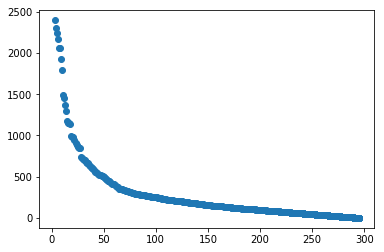

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt


plt.scatter(e['rank'], e.msno)
plt.show()

In [16]:
p=pd.read_csv('song_list_add_table',sep='\t')
p.head()

/home/e817/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,artist_name,song_id,name,album_id,artist_id
0,Dave Davies,9185019,Where Do You Come From,833052.0,497316.0
1,Suns Of Arqa,32189469,"Once, Long Ago",2926608.0,27966.0
2,Gay Lounge 1,5591616,Another Day,491541.0,325278.0
3,Nina Simone,39313600,I Got It Bad (And That Ain'tgood),3940362.0,680.0
4,Nursery Tunes,118374134,Good King Wenceslas,11349274.0,4632030.0


In [17]:
p=p.loc[:,['artist_name','artist_id']]
p

,artist_name,artist_id
0,Dave Davies,497316.0
1,Suns Of Arqa,27966.0
2,Gay Lounge 1,325278.0
3,Nina Simone,680.0
4,Nursery Tunes,4632030.0
5,Willie Nelson,11154.0
6,Mega Tracks Karaoke Band,NaN
7,Judy Collins,4407.0
8,Музыка Релакс Коллекция,NaN
9,David Murray Latin Big Band,5374592.0


In [18]:
a=df3.merge(p,on='artist_id', how='left')
a=a.drop_duplicates(['artist_id'], keep='last')
a

,artist_id,msno,rank,artist_name
665,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
1479,2.0,120,179.0,王傑 (Dave Wang)
2145,7.0,15,281.0,Cocco
3653,9.0,12,284.0,GLAY
5185,10.0,62,234.0,古巨基 (Leo Ku)
6290,11.0,69,227.0,梁詠琪 (Gigi Leung)
7017,14.0,1488,11.0,aMEI (張惠妹)
7090,17.0,6,290.0,曾寶儀
7269,18.0,47,249.0,陶晶瑩 (Matilda Tao)
7323,19.0,1,295.0,林志穎 (Jimmy Lin)


In [19]:
for h in a.sort_values('msno',ascending=False).values:
    print (h)

[4261.0 5494 1.0 '周杰倫 (Jay Chou)']
[6651.0 4797 2.0 '五月天 (Mayday)']
[8280.0 2396 3.0 '林俊傑 (JJ Lin)']
[49897.0 2304 4.0 '田馥甄 (Hebe)']
[2578468.0 2246 5.0 '玖壹壹']
[52634.0 2167 6.0 '周湯豪 (NICKTHEREAL)']
[5301.0 2063 7.0 '陳奕迅 (Eason Chan)']
[2993763.0 2062 8.0 'Alan Walker']
[40080.0 1931 9.0 '謝和弦 (R-chord)']
[4330967.0 1792 10.0 'TWICE']
[14.0 1488 11.0 'aMEI (張惠妹)']
[45702.0 1449 12.0 'G.E.M.鄧紫棋']
[2750938.0 1370 13.0 'BANGTAN BOYS']
[2424531.0 1296 14.0 'Eric 周興哲']
[747138.0 1180 15.0 'The Chainsmokers']
[13667.0 1149 16.0 'A-Lin']
[21493.0 1146 17.0 '蘇打綠 (Sodagreen)']
[43934.0 1134 18.0 'BIGBANG']
[22036.0 992 19.0 'RADWIMPS']
[1357924.0 984 20.0 '莊心妍']
[12749.0 982 21.0 '楊丞琳 (Rainie Yang)']
[10939.0 944 22.0 'Maroon 5']
[6931185.0 908 23.0 '鼓鼓 (GBOYSWAG)']
[54536.0 885 24.0 '陳勢安 (Andrew Tan)']
[4058209.0 866 25.0 '兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116)']
[30305.0 852 26.0 '林宥嘉 (Yoga Lin)']
[5461.0 851 27.0 '江蕙 (Jody Jiang)']
[49335.0 739 28.0 'Justin Bieber']
[25638.0 731 29.0 '丁噹 (Della)']
[2

[1597199.0 10 286.0 '洪天祥 (Jimmy)']
[4534391.0 10 286.0 'JoLivi']
[3048.0 10 286.0 'Keith Sweat']
[3550137.0 10 286.0 'Tim White']
[197510.0 10 286.0 'Tyga']
[504078.0 10 286.0 'Dinah Nah']
[506349.0 10 286.0 'Jon Pardi']
[2863808.0 10 286.0 '22K夢想高飛 電視原聲帶']
[14563.0 10 286.0 'Howie Day']
[2174245.0 10 286.0 'MAN WITH A MISSION']
[3565668.0 10 286.0 'Olivia Somerlyn']
[4551504.0 10 286.0 'Love Me Like You Do']
[4538.0 10 286.0 'Fleetwood Mac']
[199063.0 10 286.0 'The Knocks']
[1872.0 10 286.0 '彭羚 (Cass Phang)']
[44551.0 10 286.0 'Jessie James']
[22295.0 10 286.0 'Tom Jones']
[2066760.0 10 286.0 'Sabina Ddumba']
[4592832.0 10 286.0 '楊曉']
[6280.0 10 286.0 '楊宗憲']
[2074149.0 10 286.0 'Lu Alone']
[512190.0 10 286.0 'Ryan Stevenson']
[852871.0 10 286.0 'Bae Saetbyeol']
[852922.0 10 286.0 'Daithí feat. Raye']
[841454.0 10 286.0 'Anton Ewald']
[205230.0 10 286.0 '陳柏銓 (Barry)']
[2150797.0 10 286.0 'Vicetone']
[44817.0 10 286.0 'Charlie']
[6157551.0 10 286.0 'C Jamm, BewhY']
[30.0 10 286.0 'Yanni

[693.0 3 293.0 'Chantay Savage']
[3884625.0 3 293.0 'Oliver Heldens, Shaun Frank']
[6151695.0 3 293.0 '威廉布萊恩']
[3727.0 3 293.0 'Ben Harper']
[964850.0 3 293.0 'Mack Wilds']
[6149998.0 3 293.0 '李德筠 (Li Te-Yun)']
[3856484.0 3 293.0 '黃子軒與山平快']
[3857847.0 3 293.0 'Annet Charitonová']
[410203.0 3 293.0 'Nick Howard']
[409627.0 3 293.0 'Zeds Dead']
[31095.0 3 293.0 'Matt Wertz']
[21766.0 3 293.0 'Peter Frampton']
[31118.0 3 293.0 'MGMT']
[3860831.0 3 293.0 'Funky DL']
[964856.0 3 293.0 'A-PRINCE']
[7671.0 3 293.0 '小蟲']
[3333861.0 3 293.0 'Lee Seung Gi']
[21721.0 3 293.0 'Christoph Eschenbach/Justus Frantz']
[964991.0 3 293.0 'Priyanka Chopra']
[407473.0 3 293.0 'Varios Artistas']
[3877358.0 3 293.0 'M.S.F.N.[Make Some Funky Noise] Mix by DJ Noodles']
[21684.0 3 293.0 '何真真']
[699.0 3 293.0 'ZZ Top']
[31211.0 3 293.0 'The Platters']
[405616.0 3 293.0 'Jackson Guthy']
[1533145.0 3 293.0 'Royal Blood']
[4347872.0 3 293.0 'Fareoh']
[3519732.0 3 293.0 'Nujeel']
[192616.0 3 293.0 '先知瑪莉 (Mary See th

[6088858.0 1 295.0 'Kwon Jin Ah']
[5820030.0 1 295.0
 'Count Basie, Count Basie & His Orchestra, Count Basie & His All American Rhythm']
[3379257.0 1 295.0 'Vagueblossom']
[3379194.0 1 295.0 'Dasol Park']
[5821900.0 1 295.0 'De La Soul feat. Snoop Dogg']
[6088863.0 1 295.0 '1PS']
[5816972.0 1 295.0 '李逸朗+楊思琦']
[3714861.0 1 295.0 'MC Marcelly']
[3714871.0 1 295.0 '熊貓團 (PandaBros)']
[3379069.0 1 295.0 'Rmx Running Team']
[3716698.0 1 295.0 '張志輝 (Ahui)']
[3379006.0 1 295.0 'Thinking Dogs']
[3716901.0 1 295.0 'Dagny']
[5816593.0 1 295.0 '常靜']
[5821876.0 1 295.0 '尹洪强']
[5821911.0 1 295.0 '林長金 (KIM)']
[6089357.0 1 295.0 'Afternight Project']
[5826750.0 1 295.0 'Sophia Grace']
[6087857.0 1 295.0 '선화 (시크릿),영재 (B.A.P)']
[3686942.0 1 295.0 'Yuli Turovsky & I Musici De Montréal']
[3686944.0 1 295.0 '金鈺兒']
[6088480.0 1 295.0 '박승화 (유리상자), 한수영']
[5826757.0 1 295.0 '許時 (ShiShr)']
[3687768.0 1 295.0 '張彤昉+岡林']
[3383566.0 1 295.0 'MANWOMAN & NOSE (MANWOMAN & NOSE)']
[3687971.0 1 295.0 '黃斌武']
[3383363.0 1

[21844.0 1 295.0 'Antony & The Johnsons']
[21863.0 1 295.0 'DJ Envy']
[21880.0 1 295.0 '深白色']
[21903.0 1 295.0 'Outlandish']
[21907.0 1 295.0
 'The Chronicles of Narnia - The Lion, The Witch and the Wardrobe Original Soundtrack']
[21947.0 1 295.0 'Casella/Rossini/Respighi/Moldavian National']
[21953.0 1 295.0 'Mary Gauthier']
[8835.0 1 295.0 'Chuck Brown']
[22071.0 1 295.0 'Billy Elliot']
[21983.0 1 295.0 '+44']
[21990.0 1 295.0 "Cliff Richard With Daniel O'Donnell"]
[22002.0 1 295.0 '小城故事 電視劇原聲音樂大碟（阿杜)']
[22025.0 1 295.0 '...And You Will Know Us By The Trail Of Dead']
[22027.0 1 295.0 'Ayo']
[22034.0 1 295.0 '樂可樂非常樂']
[22070.0 1 295.0 'Renee Fleming']
[22399.0 1 295.0 'OLIVIA (オリビア)']
[22424.0 1 295.0 '2006年終極選-最紅冠軍舞曲極限全記錄']
[22974.0 1 295.0 'Offerings']
[22868.0 1 295.0 '高明德 (Andy Kao)']
[22760.0 1 295.0 'The Band']
[22786.0 1 295.0 '天作之合']
[22787.0 1 295.0 '飲食男女之世間情歌']
[22805.0 1 295.0 '中港台電視劇主題曲大比拼']
[22810.0 1 295.0 '歡樂時光']
[22815.0 1 295.0 'Ursula 1000']
[22867.0 1 295.0 '徐子源']
[

In [20]:
a['total']=(a['msno']/ a['msno'].sum())*100
a

,artist_id,msno,rank,artist_name,total
665,1.0,77,220.0,Hikaru Utada (宇多田ヒカル),0.036848
1479,2.0,120,179.0,王傑 (Dave Wang),0.057425
2145,7.0,15,281.0,Cocco,0.007178
3653,9.0,12,284.0,GLAY,0.005743
5185,10.0,62,234.0,古巨基 (Leo Ku),0.029670
6290,11.0,69,227.0,梁詠琪 (Gigi Leung),0.033020
7017,14.0,1488,11.0,aMEI (張惠妹),0.712074
7090,17.0,6,290.0,曾寶儀,0.002871
7269,18.0,47,249.0,陶晶瑩 (Matilda Tao),0.022492
7323,19.0,1,295.0,林志穎 (Jimmy Lin),0.000479


In [21]:
a.sort_values('msno',ascending=False).head(24)['total'].sum()

20.653500313446617

In [22]:
a.sort_values('msno',ascending=False).head(24)

,artist_id,msno,rank,artist_name,total
1531950,4261.0,5494,1.0,周杰倫 (Jay Chou),2.629123
1733596,6651.0,4797,2.0,五月天 (Mayday),2.295578
1813915,8280.0,2396,3.0,林俊傑 (JJ Lin),1.146593
4020997,49897.0,2304,4.0,田馥甄 (Hebe),1.102566
5949849,2578468.0,2246,5.0,玖壹壹,1.074811
4038523,52634.0,2167,6.0,周湯豪 (NICKTHEREAL),1.037006
1630777,5301.0,2063,7.0,陳奕迅 (Eason Chan),0.987237
6000518,2993763.0,2062,8.0,Alan Walker,0.986759
3883592,40080.0,1931,9.0,謝和弦 (R-chord),0.924069
6083891,4330967.0,1792,10.0,TWICE,0.857552


In [23]:
a.sort_values('msno',ascending=False)

,artist_id,msno,rank,artist_name,total
1531950,4261.0,5494,1.0,周杰倫 (Jay Chou),2.629123
1733596,6651.0,4797,2.0,五月天 (Mayday),2.295578
1813915,8280.0,2396,3.0,林俊傑 (JJ Lin),1.146593
4020997,49897.0,2304,4.0,田馥甄 (Hebe),1.102566
5949849,2578468.0,2246,5.0,玖壹壹,1.074811
4038523,52634.0,2167,6.0,周湯豪 (NICKTHEREAL),1.037006
1630777,5301.0,2063,7.0,陳奕迅 (Eason Chan),0.987237
6000518,2993763.0,2062,8.0,Alan Walker,0.986759
3883592,40080.0,1931,9.0,謝和弦 (R-chord),0.924069
6083891,4330967.0,1792,10.0,TWICE,0.857552


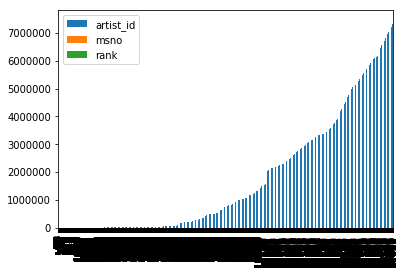

In [24]:
#e.plot(e['rank'], e.msno,kind='area')
e.plot.bar(stacked=True)

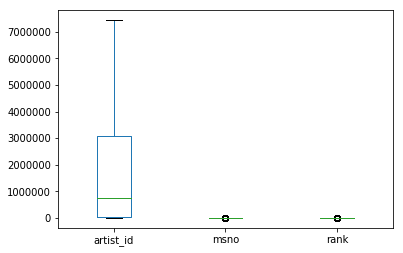

In [25]:
e.plot.box()

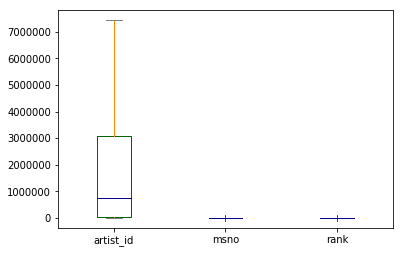

In [26]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
e.plot.box(color=color, sym='r+')

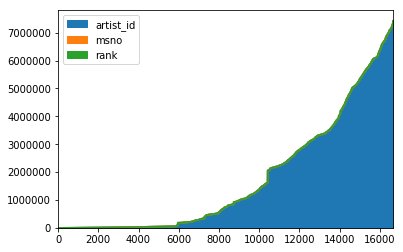

In [27]:
e.plot.area()

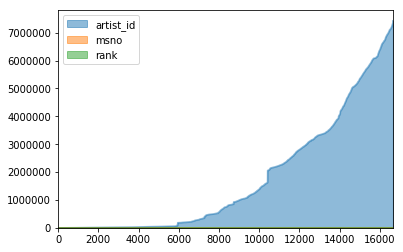

In [28]:
e.plot.area(stacked=False);

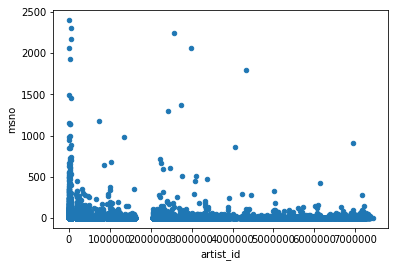

In [29]:
e.plot.scatter(x='artist_id', y='msno');

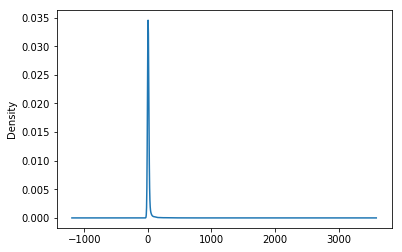

In [31]:
e['msno'].plot.kde()

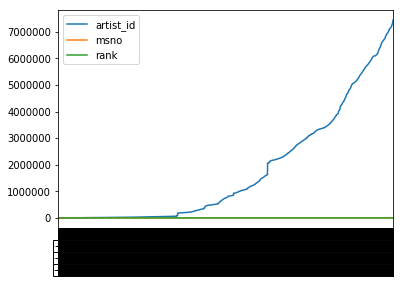

In [33]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
e.plot(table=True, ax=ax)

In [34]:
df3.to_csv('niche_artist_filter.csv',sep=',',encoding='utf-8',index=False)

In [36]:
niche_artist=df3[df3['msno']<=200]
niche_artist

,artist_id,msno,rank
0,1.0,77,220.0
1,2.0,120,179.0
2,7.0,15,281.0
3,9.0,12,284.0
4,10.0,62,234.0
5,11.0,69,227.0
7,17.0,6,290.0
8,18.0,47,249.0
9,19.0,1,295.0
10,20.0,4,292.0


In [37]:
niche_artist=niche_artist.merge(p,on='artist_id', how='left')
niche_artist

,artist_id,msno,rank,artist_name
0,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
1,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
2,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
3,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
4,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
5,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
6,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
7,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
8,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)
9,1.0,77,220.0,Hikaru Utada (宇多田ヒカル)


In [41]:
niche_artist.rename(columns={'msno': 'number'}, inplace=True)

In [47]:
niche_artist=niche_artist.drop_duplicates(['artist_id'], keep='last').sort_values('number',ascending=False)
niche_artist

,artist_id,number,rank,artist_name
4019427,55097.0,200,125.0,陳零九 (Nine Chen)
3135517,20326.0,200,125.0,方大同 (Khalil Fong)
218776,346.0,197,126.0,Beyond
4185749,206863.0,197,126.0,Carly Rae Jepsen
3953588,47867.0,195,127.0,FTISLAND
3667619,29326.0,192,128.0,OneRepublic
5408910,1205958.0,192,128.0,BIGBANG TAEYANG
5852109,2397141.0,191,129.0,李玉璽 (Dino Lee)
5248995,1013650.0,190,130.0,李國毅
4188068,207984.0,189,131.0,Imagine Dragons


In [48]:
for r in niche_artist.values:
    print (r)

[55097.0 200 125.0 '陳零九 (Nine Chen)']
[20326.0 200 125.0 '方大同 (Khalil Fong)']
[346.0 197 126.0 'Beyond']
[206863.0 197 126.0 'Carly Rae Jepsen']
[47867.0 195 127.0 'FTISLAND']
[29326.0 192 128.0 'OneRepublic']
[1205958.0 192 128.0 'BIGBANG TAEYANG']
[2397141.0 191 129.0 '李玉璽 (Dino Lee)']
[1013650.0 190 130.0 '李國毅']
[207984.0 189 131.0 'Imagine Dragons']
[28745.0 189 131.0 'Katy Perry']
[38.0 185 132.0 '鄧麗君 (Teresa Teng)']
[5965.0 184 133.0 '陶喆 (David Tao)']
[4062.0 184 133.0 '陳小春 (Jordan Chan)']
[3321111.0 181 134.0 '喬幼']
[1067916.0 180 135.0 '聽見下雨的聲音 電影原聲帶']
[3177329.0 179 136.0 'AMIT']
[3196.0 179 136.0 '戴佩妮 (Penny Tai)']
[2537966.0 178 137.0 'EXID']
[48967.0 177 138.0 'Ellie Goulding']
[5047441.0 177 138.0 'SEVENTEEN']
[8143.0 176 139.0 '戴愛玲 (Ailing Tai)']
[29863.0 176 139.0 'Pitbull']
[5305.0 176 139.0 '5566']
[1034388.0 174 140.0 '陳彥允 (Ian Chen)']
[12027.0 170 141.0 'Jason Mraz']
[55507.0 170 141.0 '梁心頤 (Lara)']
[196178.0 169 142.0 'Avicii']
[437.0 169 142.0 '潘瑋柏 (Will Pan)']
[813

[3354.0 9 287.0 '張智霖 (Chilam Cheung)']
[44364.0 9 287.0 'Dimitri Vegas & Like Mike']
[205676.0 9 287.0 '林良歡']
[2369342.0 9 287.0 'Maddie & Tae']
[1501716.0 9 287.0 'New Hollow']
[4271027.0 9 287.0 '臺灣福音書房 (Taiwan Gospel Book Room)']
[23453.0 9 287.0 'tobyMac']
[4476618.0 9 287.0 'Stevie Hoang, Mumzy Stranger']
[55424.0 9 287.0 'JONAS L.A. OST']
[3630957.0 9 287.0 'Zak Abel']
[3892255.0 9 287.0 'Vyrus']
[3779888.0 9 287.0 'Legaci']
[3787433.0 9 287.0 'Gareth Emery & Alastor feat. London Thor']
[7106458.0 9 287.0 '守夜人 (Night Keepers)']
[831152.0 9 287.0 '竹仲絵里']
[856.0 9 287.0 'All Saints']
[3724829.0 9 287.0 'Арцвик']
[5446.0 9 287.0 '曾心梅']
[2980863.0 9 287.0 '繼承者們 電視原聲帶1']
[5751057.0 9 287.0 'Martin Garrix, Third Party']
[2556328.0 9 287.0 'Ezra Vine']
[2280591.0 9 287.0 'Syd Youth']
[3508304.0 9 287.0 'REOL']
[51085.0 9 287.0 'Erin McCarley']
[3103502.0 9 287.0 'Ready Revolution']
[5199417.0 9 287.0 'Justs Sirmais']
[2163915.0 9 287.0 'Emily Hearn']
[2164899.0 9 287.0 'Cable Car']
[182

[3299881.0 2 294.0 '絶対零度']
[2538.0 2 294.0 'Art Tatum']
[3286401.0 2 294.0 'Kap Slap']
[2196927.0 2 294.0 'Big Freedia']
[2525.0 2 294.0 'Level 42']
[2197597.0 2 294.0 'Teamheadkick']
[2197675.0 2 294.0 'Olivia Holt']
[3278862.0 2 294.0 'Steve Aoki feat. LINKIN PARK']
[3270965.0 2 294.0 'Luna Haruna (春奈るな)']
[1435.0 2 294.0 'Jessica Simpson']
[2202862.0 2 294.0 'Groove Edition']
[2202937.0 2 294.0 'Vinyl_House']
[1438.0 2 294.0 'Randy Travis']
[3263500.0 2 294.0 'Sivik']
[2202972.0 2 294.0 'Achtung']
[3259906.0 2 294.0 'Jeff LeBlanc']
[3259096.0 2 294.0 'Fabian Mazur']
[3258528.0 2 294.0 'N-Sonic']
[2207629.0 2 294.0 '北七樂團']
[2230406.0 2 294.0 'Above & Beyond feat. Alex Vargas']
[2231505.0 2 294.0 'Young Rising Sons']
[2232384.0 2 294.0 'Katica Illényi']
[2344.0 2 294.0 'Dave Angel']
[2255868.0 2 294.0 'MADE IN HEIGHTS']
[3134714.0 2 294.0 'Keebomb']
[1537.0 2 294.0 '裘海正']
[3134386.0 2 294.0 'JooYoung']
[2258090.0 2 294.0
 'DJ Snake & Lil Jon feat. Juicy J, 2 Chainz, and French Montana

[11579.0 1 295.0 'Skid Row']
[11589.0 1 295.0 'Kristina']
[11286.0 1 295.0 'Deana Carter']
[7292269.0 1 295.0 'Atriohm']
[7292091.0 1 295.0 '廢墟樂隊']
[11642.0 1 295.0 '陳坤']
[11644.0 1 295.0 'William Orbit']
[7198816.0 1 295.0 '布偶樂隊']
[7198365.0 1 295.0 '1 AMVRKA']
[7197840.0 1 295.0 'Nall, Lui Peng']
[7135505.0 1 295.0 '蘇丁琦 (Amy)']
[7150111.0 1 295.0 'True Riot']
[7149520.0 1 295.0 'Sylo Nozra']
[7147343.0 1 295.0 'Jauz, San Holo']
[7145312.0 1 295.0 "Granny's Bathwater"]
[7141248.0 1 295.0 'Peter from The Marshmallow Kisses']
[11921.0 1 295.0 '拜訪者']
[7139243.0 1 295.0
 "Frankie Laine With Carl Fisher's, Costanzo, Frankie Laine, The McGuire Sisters, Joni James"]
[11938.0 1 295.0 'Deee-Lite']
[11967.0 1 295.0 'Phish']
[7136146.0 1 295.0 '簡淑萍']
[11978.0 1 295.0 '愛情保鮮盒']
[7135872.0 1 295.0 'Heather Day']
[11985.0 1 295.0 'Linda Ronstadt, Dolly Parton, Emmylou Harris']
[54.0 1 295.0 'Naohito Fujiki (藤木直人)']
[7153293.0 1 295.0 '朱莉葉']
[11990.0 1 295.0 'ㄉㄧㄢˋㄉㄧㄢˋ (dMDM)']
[7128183.0 1 295.0 'Tho

[3046133.0 1 295.0 '曹西平']
[43950.0 1 295.0 'Protect The Love']
[3046096.0 1 295.0 '黃麗卿']
[3013651.0 1 295.0 'Menaka']
[3013001.0 1 295.0 'Pavel Dovgal']
[43686.0 1 295.0 '羅憶詩 (Yise Loo)']
[9183.0 1 295.0 '謝宇書']
[3012632.0 1 295.0 'Shannon,vasco,Giriboy']
[43704.0 1 295.0 'Japandroids']
[43827.0 1 295.0 '邱家鈺 (Becky)']
[43835.0 1 295.0 '靈修默想']
[3008387.0 1 295.0 'Sacral Chakra Universe']
[43837.0 1 295.0 'Worship From The Word']
[3001311.0 1 295.0 'Tiger JK']
[1678.0 1 295.0 'Anggun']
[43838.0 1 295.0 '天籟交響詩']
[43843.0 1 295.0 'Harp Country Inspirations']
[43848.0 1 295.0 'Kleerup']
[2999006.0 1 295.0 'Bonni Dance']
[2997703.0 1 295.0 "FlipN'gawd"]
[2997408.0 1 295.0 'Robert Haggarty']
[43916.0 1 295.0 'Reflex']
[43926.0 1 295.0 '庹丹丹']
[2994254.0 1 295.0 'Uptown Funk']
[2993557.0 1 295.0 'Molla Boing J']
[2993107.0 1 295.0 'DJ Antos']
[2992559.0 1 295.0 'RTM ALL STARZ']
[2992262.0 1 295.0 'Tais']
[2992071.0 1 295.0 'Dorothy Little Happy']
[9182.0 1 295.0 '鄭雪兒']
[2988907.0 1 295.0 'Rashau

In [49]:
niche_artist.to_hdf('niche_artist.h5','a')

In [3]:
df[df['msno']==8845025]

,msno,artist_id,number,artist_total_number,number_rate,max_rate,each_artist_entrop
10055662,8845025,668175.0,539.0,543.0,0.992634,0.992634,0.06
10055663,8845025,844127.0,1.0,543.0,0.001842,0.992634,0.06
10055664,8845025,936463.0,1.0,543.0,0.001842,0.992634,0.06
77942042,8845025,29984.0,1.0,543.0,0.001842,0.992634,0.06
84966015,8845025,14.0,1.0,543.0,0.001842,0.992634,0.06
